In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline
PATH='/Users/antoniocampello/PycharmProjects/explore_the_rain_forest'

In [230]:
df=pd.read_csv(PATH+'/data/labels/train_v2.csv')

In [231]:
def show_image_and_label(i):
    testRGB = cv2.imread(PATH+'/data/train_jpg/train_'+str(i)+'.jpg')
    testRGB = cv2.cvtColor(testRGB,cv2.COLOR_BGR2RGB)
    plt.title(df['tags'][i])
    plt.imshow(testRGB)

In [232]:
# Transforming list and cleans redudancy
aux=[i.split(' ') for i in df['tags'].values]
aux=[list(set(i)) for i in aux]
df['n param'] = np.array([len(i) for i in aux])
df['tags'] = [' '.join(i) for i in aux]

In [233]:
col2=df['n param']

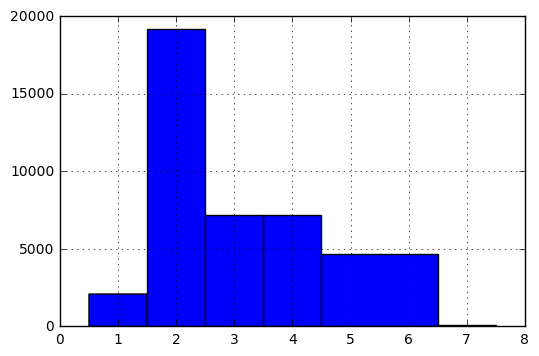

In [234]:
col2.hist(bins=[0.5,1.5,2.5,3.5,4.5,6.5,7.5])

In [242]:
Ntotal=len(df)

In [307]:
Nprimary=len(df[df['tags'].str.contains('primary')])/Ntotal
print('%% of photos showing "primary": %.2f%%'%(Nprimary*100))

#Creates a dictionary of types
dic_of_types= list(set((' '.join([i for i in df['tags'].values])).split()))
Ntypes=len(dic_of_types)

% of photos showing "primary": 92.67%


In [308]:
dic_of_types

['road',
 'blow_down',
 'slash_burn',
 'clear',
 'partly_cloudy',
 'haze',
 'agriculture',
 'cloudy',
 'artisinal_mine',
 'selective_logging',
 'cultivation',
 'water',
 'habitation',
 'bare_ground',
 'blooming',
 'primary',
 'conventional_mine']

In [299]:
for el in dic_of_types:
    df[el]=np.zeros(Ntotal,dtype=int)
    df.loc[df['tags'].str.contains(el),el]=1

In [300]:
df

,image_name,tags,n param,road,blow_down,slash_burn,clear,partly_cloudy,haze,agriculture,cloudy,artisinal_mine,selective_logging,cultivation,water,habitation,bare_ground,blooming,primary,conventional_mine
0,train_0,primary haze,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,train_1,clear water primary agriculture,4,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
2,train_2,clear primary,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,train_3,clear primary,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,train_4,road clear primary agriculture habitation,5,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
5,train_5,primary haze water,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
6,train_6,clear water primary cultivation agriculture,5,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
7,train_7,primary haze,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,train_8,clear primary cultivation agriculture,4,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
9,train_9,road clear primary cultivation agriculture,5,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


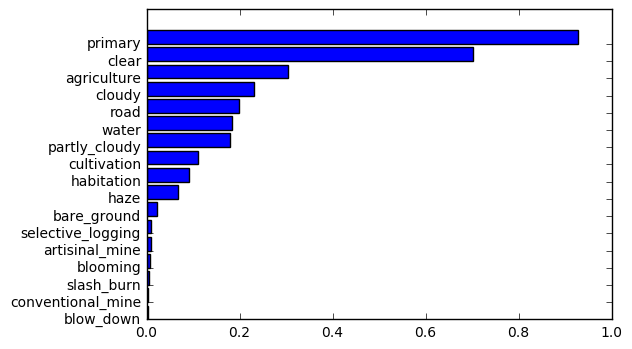

In [347]:
frequencies=np.array([df[el].sum()/Ntotal for el in dic_of_types])
order=frequencies.argsort()
frequencies=frequencies[order]
dic_of_types_np=np.array(dic_of_types)[order]
plt.barh(range(Ntypes),frequencies)
plt.yticks(range(Ntypes),dic_of_types_np)
plt.show()

In [343]:
dic_of_types_np

array(['road', 'blow_down', 'slash_burn', 'clear', 'partly_cloudy', 'haze',
       'agriculture', 'cloudy', 'artisinal_mine', 'selective_logging',
       'cultivation', 'water', 'habitation', 'bare_ground', 'blooming',
       'primary', 'conventional_mine'], 
      dtype='<U17')

In [331]:
frequencies=np.array([[el,df[el].sum()/Ntotal] for el in dic_of_types])
frequencies_sorted=frequencies[frequencies[:,1].argsort()[::-1]]

In [335]:
frequencies_sorted[:,1]

array(['0.9267274389189456', '0.702364188838657', '0.3042318239086934',
       '0.2309839669952321', '0.1993873366436918', '0.18308258603226366',
       '0.1793769608933027', '0.11060055831418761', '0.090417253390647',
       '0.06662713999851776', '0.021294992465228885',
       '0.008399416981644803', '0.00837471281405173',
       '0.00820178364090022', '0.005163171026952247',
       '0.002470416759307295', '0.0024210084241211493'], 
      dtype='<U21')